In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Data, download from: https://www.kaggle.com/claytonmiller/building-data-genome-project-v1
df = pd.read_csv("data/meta_open.csv")

In [3]:
df.head()

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename,annualschedule
0,Office_Abbey,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,74180.0,6891.544540,College/University,America/Phoenix,1930,Abbey,Office,weather0.csv,schedule2.csv
1,Office_Abigail,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,9703.0,901.437809,College/University,America/Phoenix,1940,Abigail,Office,weather0.csv,schedule2.csv
2,Office_Al,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,118966.0,11052.298300,College/University,America/Phoenix,1988,Al,Office,weather0.csv,schedule2.csv
3,Office_Alannah,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,10135.0,941.571905,College/University,America/Phoenix,NaN,Alannah,Office,weather0.csv,schedule2.csv
4,Office_Aliyah,31/12/15 23:00,1/1/15 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,202435.0,18806.818810,College/University,America/Phoenix,1967,Aliyah,Office,weather0.csv,schedule2.csv


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uid                     507 non-null    object 
 1   dataend                 507 non-null    object 
 2   datastart               507 non-null    object 
 3   energystarscore         26 non-null     float64
 4   heatingtype             124 non-null    object 
 5   industry                507 non-null    object 
 6   mainheatingtype         122 non-null    object 
 7   numberoffloors          124 non-null    float64
 8   occupants               105 non-null    float64
 9   primaryspaceusage       507 non-null    object 
 10  rating                  131 non-null    object 
 11  sqft                    507 non-null    float64
 12  sqm                     507 non-null    float64
 13  subindustry             507 non-null    object 
 14  timezone                507 non-null    ob

In [6]:
df.timezone.unique()

array(['America/Phoenix', 'America/Los_Angeles', 'America/New_York',
       'Europe/London', 'America/Chicago', 'Europe/Zurich',
       'America/Denver', 'Asia/Singapore'], dtype=object)

In [7]:
df.industry.unique()

array(['Education', 'Commercial Property', 'Government'], dtype=object)

In [8]:
timezone = 'America/Chicago'
industry = 'Education'
area_df = df.loc[(df['timezone'] == timezone) & (df['industry'] == industry)]
area_df = area_df[['uid', 'newweatherfilename']]

In [9]:
area_df

,uid,newweatherfilename
90,Office_Mada,weather3.csv
91,Office_Madeleine,weather3.csv
92,Office_Madisyn,weather3.csv
93,Office_Malik,weather3.csv
94,Office_Marc,weather3.csv
...,...,...
484,UnivLab_Marie,weather3.csv
485,UnivLab_Mario,weather3.csv
486,UnivLab_Marshall,weather3.csv
487,UnivLab_Miles,weather3.csv


In [10]:
area_df.newweatherfilename.unique()

array(['weather3.csv', 'weather9.csv', 'weather11.csv', 'weather19.csv',
       'weather26.csv', 'weather32.csv', 'weather21.csv'], dtype=object)

In [13]:
building_df = pd.read_csv('data/' + area_df['uid'].values[0] + '.csv')

In [14]:
building_df.head()

,timestamp,Office_Mada
0,2014-05-01 00:00:00,46.50
1,2014-05-01 01:00:00,43.50
2,2014-05-01 02:00:00,45.00
3,2014-05-01 03:00:00,45.75
4,2014-05-01 04:00:00,45.25


In [15]:
building_df.columns = ['timestamp', 'kwh']

In [16]:
building_df.head()

,timestamp,kwh
0,2014-05-01 00:00:00,46.50
1,2014-05-01 01:00:00,43.50
2,2014-05-01 02:00:00,45.00
3,2014-05-01 03:00:00,45.75
4,2014-05-01 04:00:00,45.25


In [17]:
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8760 non-null   object 
 1   kwh        8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [18]:
weather_df = pd.read_csv('data/' + area_df['newweatherfilename'].values[0])

In [19]:
weather_df.head()

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeCDT,TimeCST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
0,2014-05-01 00:53:00,Light Drizzle,2014-05-01 05:53:00<br />,3.9,NaN,-,100.0,0.0,1007.3,3.9,12:53 AM,NaN,6.4,NNW,18.5,330,2014-05-01 00:53:00
1,2014-05-01 01:01:00,Overcast,2014-05-01 06:01:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:01 AM,NaN,8.0,NNW,18.5,330,2014-05-01 01:01:00
2,2014-05-01 01:10:00,Overcast,2014-05-01 06:10:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:10 AM,NaN,12.9,NW,18.5,320,2014-05-01 01:10:00
3,2014-05-01 01:19:00,Overcast,2014-05-01 06:19:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:19 AM,NaN,14.5,NNW,20.4,340,2014-05-01 01:19:00
4,2014-05-01 01:29:00,Overcast,2014-05-01 06:29:00<br />,3.3,NaN,-,93.0,0.0,1006.3,4.4,1:29 AM,NaN,16.1,NNW,16.7,330,2014-05-01 01:29:00


In [20]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10810 entries, 0 to 10809
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              10810 non-null  object 
 1   Conditions             10810 non-null  object 
 2   DateUTC<br />          10810 non-null  object 
 3   Dew PointC             10810 non-null  float64
 4   Events                 1573 non-null   object 
 5   Gust SpeedKm/h         10810 non-null  object 
 6   Humidity               10809 non-null  float64
 7   Precipitationmm        1968 non-null   float64
 8   Sea Level PressurehPa  10810 non-null  float64
 9   TemperatureC           10810 non-null  float64
 10  TimeCDT                6816 non-null   object 
 11  TimeCST                3994 non-null   object 
 12  VisibilityKm           10810 non-null  float64
 13  Wind Direction         10810 non-null  object 
 14  Wind SpeedKm/h         10810 non-null  object 
 15  Wi

In [21]:
weather_df = weather_df[['timestamp', 'TemperatureC', 'Humidity']]

In [22]:
weather_df.head()

,timestamp,TemperatureC,Humidity
0,2014-05-01 00:53:00,3.9,100.0
1,2014-05-01 01:01:00,3.9,100.0
2,2014-05-01 01:10:00,3.9,100.0
3,2014-05-01 01:19:00,3.9,100.0
4,2014-05-01 01:29:00,4.4,93.0


In [23]:
building_df['timestamp'] = pd.to_datetime(building_df['timestamp'])

In [24]:
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  8760 non-null   datetime64[ns]
 1   kwh        8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [25]:
weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'])

In [26]:
weather_df.head()

,timestamp,TemperatureC,Humidity
0,2014-05-01 00:53:00,3.9,100.0
1,2014-05-01 01:01:00,3.9,100.0
2,2014-05-01 01:10:00,3.9,100.0
3,2014-05-01 01:19:00,3.9,100.0
4,2014-05-01 01:29:00,4.4,93.0


In [27]:
building_df = building_df.set_index('timestamp')

In [28]:
building_df.head()

,kwh
timestamp,
2014-05-01 00:00:00,46.50
2014-05-01 01:00:00,43.50
2014-05-01 02:00:00,45.00
2014-05-01 03:00:00,45.75
2014-05-01 04:00:00,45.25


In [29]:
building_df = building_df.resample('H').mean()

In [30]:
weather_df = weather_df.set_index('timestamp')

In [31]:
weather_df.head()

,TemperatureC,Humidity
timestamp,,
2014-05-01 00:53:00,3.9,100.0
2014-05-01 01:01:00,3.9,100.0
2014-05-01 01:10:00,3.9,100.0
2014-05-01 01:19:00,3.9,100.0
2014-05-01 01:29:00,4.4,93.0


In [32]:
weather_df = weather_df.resample('H').mean()

In [33]:
weather_df.head()

,TemperatureC,Humidity
timestamp,,
2014-05-01 00:00:00,3.90,100.0
2014-05-01 01:00:00,4.15,96.5
2014-05-01 02:00:00,3.90,100.0
2014-05-01 03:00:00,3.60,96.5
2014-05-01 04:00:00,3.30,97.0


In [34]:
building_weather_df = pd.merge(building_df, weather_df, how='left', on='timestamp')

In [35]:
building_weather_df.head()

,kwh,TemperatureC,Humidity
timestamp,,,
2014-05-01 00:00:00,46.50,3.90,100.0
2014-05-01 01:00:00,43.50,4.15,96.5
2014-05-01 02:00:00,45.00,3.90,100.0
2014-05-01 03:00:00,45.75,3.60,96.5
2014-05-01 04:00:00,45.25,3.30,97.0


In [36]:
building_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2014-05-01 00:00:00 to 2015-04-30 23:00:00
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kwh           8759 non-null   float64
 1   TemperatureC  8721 non-null   float64
 2   Humidity      8721 non-null   float64
dtypes: float64(3)
memory usage: 273.8 KB


In [37]:
building_weather_df = building_weather_df.fillna(method='bfill')

In [38]:
building_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2014-05-01 00:00:00 to 2015-04-30 23:00:00
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kwh           8760 non-null   float64
 1   TemperatureC  8760 non-null   float64
 2   Humidity      8760 non-null   float64
dtypes: float64(3)
memory usage: 273.8 KB


In [41]:
train_df = building_weather_df.truncate(before='2014-01-01', after='2014-12-31')

In [42]:
test_df = building_weather_df.truncate(before='2014-12-31', after='2015-12-31')

In [46]:
h1 = pd.get_dummies(train_df.index.hour)
d1 = pd.get_dummies(train_df.index.dayofweek)
t1 = pd.DataFrame(train_df['TemperatureC'].values)
hu1 = pd.DataFrame(train_df['Humidity'].values)
train_features = pd.concat([h1,d1,t1,hu1], axis=1).dropna()

In [47]:
train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,23,0,1,2,3,4,5,6,0,0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3.90,100.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,4.15,96.5
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3.90,100.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3.60,96.5
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3.30,97.0


In [48]:
h2 = pd.get_dummies(test_df.index.hour)
d2 = pd.get_dummies(test_df.index.dayofweek)
t2 = pd.DataFrame(test_df['TemperatureC'].values)
hu2 = pd.DataFrame(test_df['Humidity'].values)
test_features = pd.concat([h2,d2,t2,hu2], axis=1).dropna()

In [49]:
test_features.head()

,0,1,2,3,4,5,6,7,8,9,...,23,0,1,2,3,4,5,6,0,0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-21.1,79.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-21.1,79.0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-21.7,79.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-21.7,79.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-21.1,75.0


In [50]:
knn = KNeighborsRegressor(n_neighbors=1).fit(np.array(train_features), np.array(train_df['kwh'].values))

In [51]:
predict = knn.predict(np.array(test_features))

In [52]:
predict

array([ 58.  ,  58.  ,  58.  , ..., 112.5 ,  40.75,  58.  ])

In [54]:
predict_df = pd.DataFrame(predict, index=test_df.index)

In [55]:
predict_df.head()

,0
timestamp,
2014-12-31 00:00:00,58.00
2014-12-31 01:00:00,58.00
2014-12-31 02:00:00,58.00
2014-12-31 03:00:00,58.00
2014-12-31 04:00:00,63.25


In [56]:
predict_df.columns = ['kwh']

In [57]:
predict_df.head()

,kwh
timestamp,
2014-12-31 00:00:00,58.00
2014-12-31 01:00:00,58.00
2014-12-31 02:00:00,58.00
2014-12-31 03:00:00,58.00
2014-12-31 04:00:00,63.25


In [58]:
result_df = pd.merge(test_df, predict_df, how='left', on='timestamp')

In [59]:
result_df.head()

,kwh_x,TemperatureC,Humidity,kwh_y
timestamp,,,,
2014-12-31 00:00:00,58.00,-21.1,79.0,58.00
2014-12-31 01:00:00,58.25,-21.1,79.0,58.00
2014-12-31 02:00:00,54.25,-21.7,79.0,58.00
2014-12-31 03:00:00,55.00,-21.7,79.0,58.00
2014-12-31 04:00:00,55.50,-21.1,75.0,63.25


In [61]:
result_cols = result_df[['kwh_x', 'kwh_y']]

<AxesSubplot:xlabel='timestamp'>

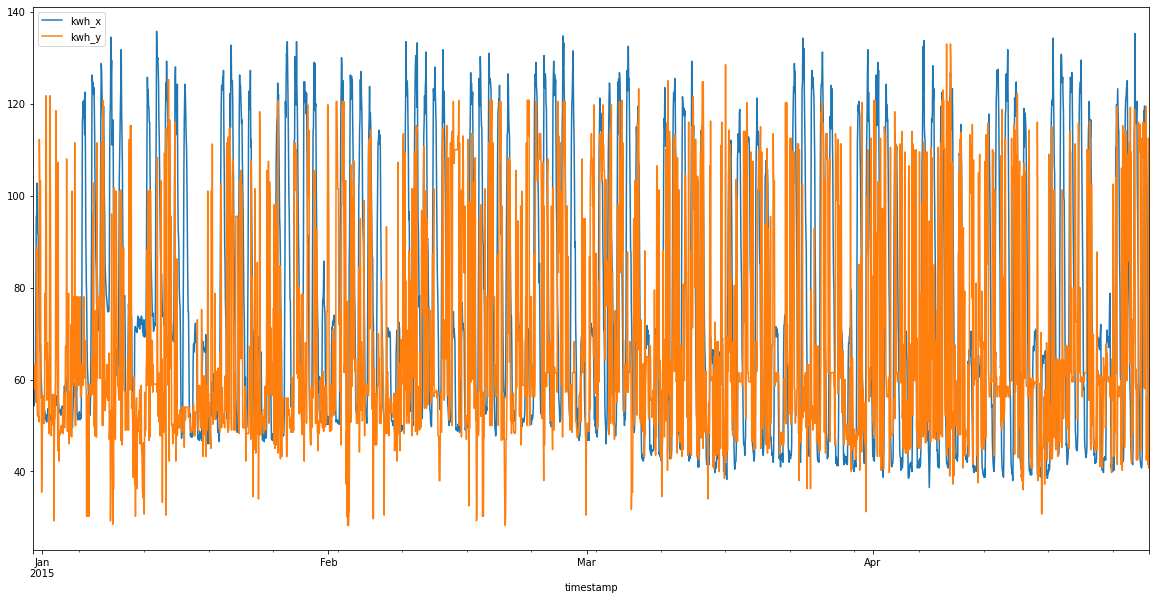

In [62]:
result_cols.plot(figsize=(20,10))

In [63]:
result_df.to_csv('result.csv')